In [3]:
#
# Projekt 1: Verkehrszeichenerkennung mit Keras
# Laden des vortrainierten Modells aus road_signs.py 
#
import os
import random
import tensorflow as tf
import numpy as np
import PIL
import webcolors
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.models import load_model
from numpy import genfromtxt
from pandas import read_csv
from skimage import color, exposure, transform, io
from PIL import Image
from textwrap import wrap

In [5]:
IMG_SIZE = 32 

In [6]:
TEST_IMAGES_PATH = "./img/test"

In [7]:
# Namen der Verkehrsschilder werden geladen
sign_names = read_csv('road_signs_names.csv', delimiter=',',dtype=None)

In [8]:
def get_roadsign_name(index):
    return sign_names.values[index][1]

In [9]:
def preprocess_image(img):
    img = np.asarray(img)
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE))
    return img 

In [10]:
# Das Keras Model (*.h5) wird geladen
roadsign_model = load_model('road_signs_model.h5')

In [11]:
# Hier werden Zufallsbilder aus den Verzeichnissen genommen und deren Label 
# und das Ergebnis der Vorhersage für die Anzeige zwischengespeichert 
roadsign_images = []
roadsign_labels = []
predicted_roadsign_labels = []

In [12]:
picture_directories = [pic for pic in os.listdir(TEST_IMAGES_PATH) if not pic.startswith(".")]
num_roadsign_classes = len(picture_directories)

In [13]:
random.seed(250) 
dirs = enumerate(random.sample(picture_directories,num_roadsign_classes))
for _, directory_path in dirs:

    img_path = TEST_IMAGES_PATH + "/" + directory_path + "/00001_00019.ppm"
    dir_index = int(directory_path)
    image = preprocess_image(Image.open(img_path)) / 255.0
    # reshape wird benutzt, um dem Eingabebild die gleiche shape zu geben, wie die Eingabeschicht des Modells
    # input_shape = (IMG_SIZE,IMG_SIZE,3)
    predicted_roadsign_class = np.argmax(roadsign_model.predict(image.reshape(-1,IMG_SIZE,IMG_SIZE,3)))
    roadsign_images.append(image*255.0)
    roadsign_labels.append("\n".join(wrap(get_roadsign_name(dir_index),15)))
    predicted_roadsign_labels.append("\n".join(wrap(get_roadsign_name(predicted_roadsign_class),15)))

In [14]:
# Ein Rand (rot oder grün) wird dem Bild hinzugefügt
# Adaptiert von https://stackoverflow.com/questions/43261338/adding-a-border-to-and-image-in-my-code    
def frame_image(img,color_name):
    
    if(color_name=="green"):
        color = (0.0,125.0,0.0)
    else: 
        if(color_name=="red"):
            color = (125.0,0.0,0.0)

    border_size = 5 # Breite des Randes in Pixel
    ny, nx = img.shape[0], img.shape[1] # Auflösung / Anzahl Pixel in X und Y
    if img.ndim == 3: # RGB Array
        framed_img = np.full((border_size+ny+border_size, border_size+nx+border_size, img.shape[2]),color)

    framed_img[border_size:-border_size, border_size:-border_size] = img
    return framed_img

In [15]:
# Anzeige der Vorhersage vs. realen Daten
def display_predictions_vs_real_classes():
    
    plt.rc('font', size=12)    
    plt.rcParams["figure.figsize"] = (20,5)
    fig, axarr = plt.subplots(1,10,squeeze=False)
    num = 0
    # Wir nehmen die ersten 10 Bilder 
    for i in range(0,10):
        roadsign_name = roadsign_labels[num]
        predicted_roadsign_name = predicted_roadsign_labels[num]
        
        color = "red"
        icon = "☹️"
        if(roadsign_name == predicted_roadsign_name):
            color = "green"
            icon = "😃"

        axarr[0][i].text(0,60,icon+"\nReal:\n" + roadsign_name + "\n\nErkannt :\n" + str(predicted_roadsign_name),color=color, verticalalignment='top', horizontalalignment='left')
        
        image = frame_image(roadsign_images[num],color)
        axarr[0][i].imshow(image)
        axarr[0][i].axis('off')
        num +=1
        
    fig.suptitle('Ergebnisse',fontsize=16,fontweight="bold")
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

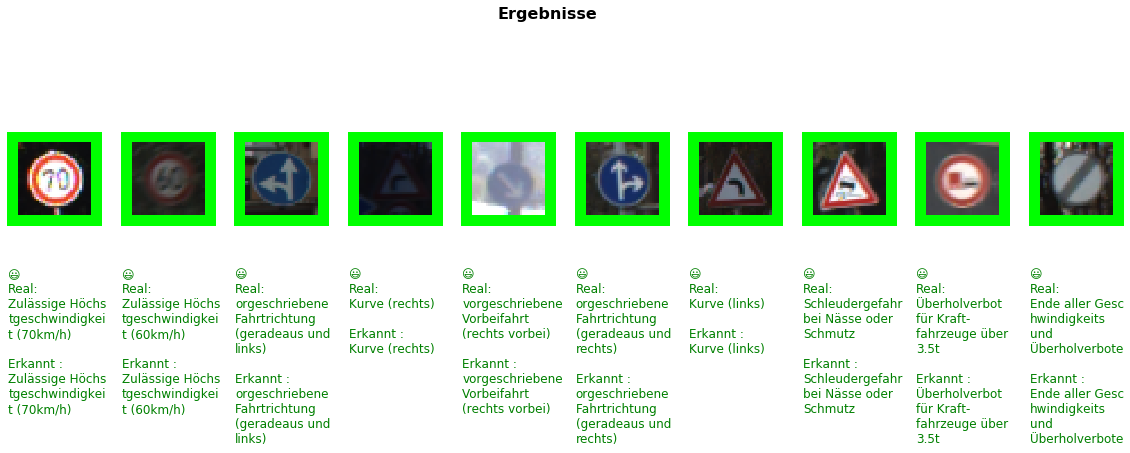

In [16]:
# Überprüfung des Modells mit 10 zufällig ausgewählen Bildern
display_predictions_vs_real_classes()